In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the dataset
data = pd.read_csv('./HeartDisease.csv')

In [3]:
print(data.head())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [4]:
print(data.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [6]:
# Define features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Initialize models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()

In [9]:

# Train and evaluate each model
models = [log_reg, decision_tree, random_forest, svm, knn]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


Logistic Regression Performance:
Accuracy: 0.8613445378151261
Precision: 0.8712121212121212
Recall: 0.8778625954198473
F1 Score: 0.8745247148288974
[[ 90  17]
 [ 16 115]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Decision Tree Performance:
Accuracy: 0.8907563025210085
Precision: 0.9338842975206612
Recall: 0.8625954198473282
F1 Score: 0.8968253968253969
[[ 99   8]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       107
           1       0.93      0.86      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



Random

In [10]:

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(random_forest, X, y, cv=10)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean()}")


Random Forest Cross-Validation Accuracy: 0.9319327731092437


In [11]:
# Feature Importance
random_forest.fit(X_train, y_train)
feature_importance = random_forest.feature_importances_

# Plot feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

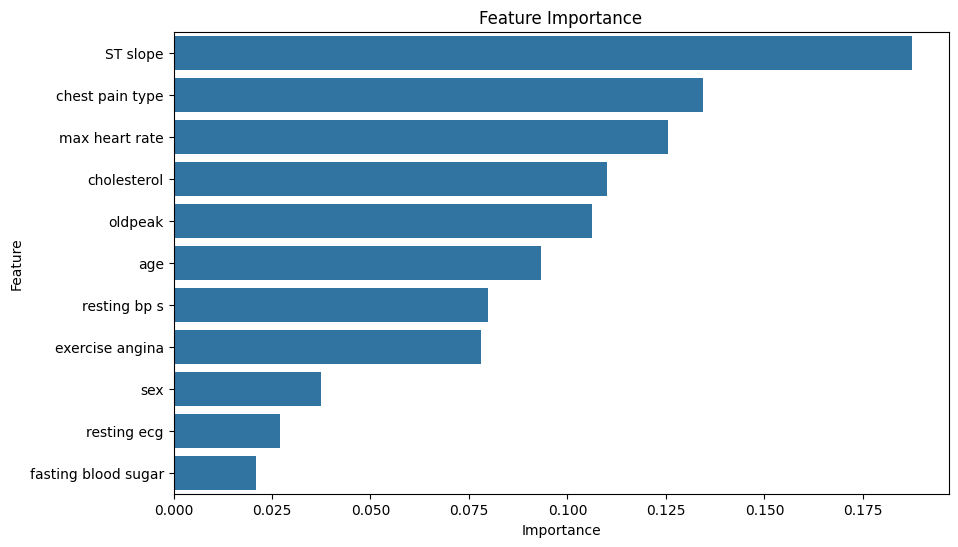

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()